# Disciplina de Tópicos em Inteligência Computacional
Explorando base de dados iris

Importação das bibliotecas necessárias para a execução dos métodos:

In [21]:
from sklearn import datasets,svm
import matplotlib.pyplot as plt
import numpy
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix

Leitura da base de dados iris:

In [22]:
iris = datasets.load_iris()
X = iris.data[:,:3]
y = iris.target 

Obtendo o dados de treinamento:

In [23]:
yt = numpy.concatenate([y[:40], y[51:90], y[101:140]])
xt = numpy.concatenate([X[:40,:], X[51:90,:], X[101:140,:]])

Dados para validação:

In [24]:
yv = numpy.concatenate([y[40:50], y[90:100], y[140:150]])
xv = numpy.concatenate([X[40:50,:], X[90:100,:], X[140:150,:]])

# Método Gaussiano Naive Bayes

In [25]:
gnb = GaussianNB()

Treinamento do método Gaussiano Naive Bayes:

In [26]:
gnb.fit(xt,yt)

GaussianNB()

Predição do método Gaussiano Naive Bayes comparado aos dados reais:

In [27]:
gnb_predicao = gnb.predict(xv)
print(yv)
print(gnb_predicao)


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 1 2 2 2]


# Método Support Vector Machines

In [28]:
svm_c = svm.SVC()

Treinamento do SVM:

In [29]:
svm_c.fit(xt,yt)

SVC()

Predição do método SVM comparado aos dados reais:

In [30]:
svm_predicao = svm_c.predict(xv)
print(yv)
print(svm_predicao)


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


# Método MLP

In [31]:
clf = MLPClassifier(alpha=0.01,max_iter=2000)

Treinamento do MLP

In [32]:
clf.fit(xt, yt)  

MLPClassifier(alpha=0.01, max_iter=2000)

Predição do modelo MLP comparado aos dados reais

In [33]:
clf_predicao = clf.predict(xv)
print(yv)
print(clf_predicao)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2]


# Matrizes de confusão 
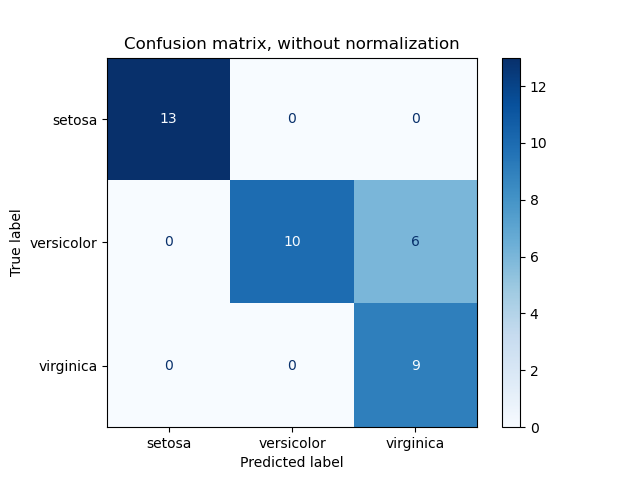


**Support Vector Machine**

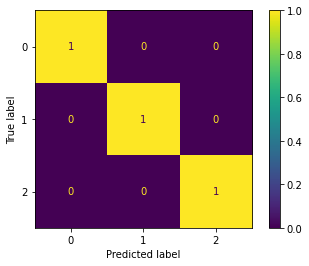

In [34]:
plot_confusion_matrix(svm_c,xv,yv, normalize='true')
plt.show()

**Naive Bayes**

[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


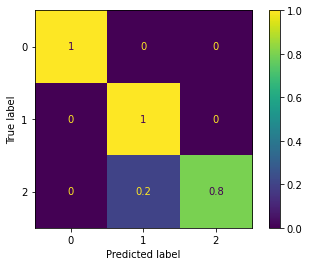

In [35]:
print(confusion_matrix(yv, gnb_predicao))
plot_confusion_matrix(gnb,xv,yv, normalize='true')
plt.show()

**MLP**

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


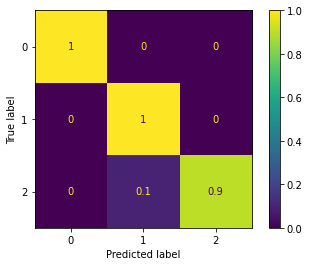

In [36]:
print(confusion_matrix(yv, clf_predicao))
plot_confusion_matrix(clf,xv,yv, normalize='true')
plt.show()

# Resultados Finais

**Support Vector Machine**

In [37]:
print(classification_report(yv, svm_predicao))
print(f'Quantidade de falsos positivos: {(yv!=svm_predicao).sum()}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Quantidade de falsos positivos: 0


**Naive Bayes**

In [38]:
print(classification_report(yv, gnb_predicao))
print(f'Quantidade de falsos positivos: {(yv!=gnb_predicao).sum()}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Quantidade de falsos positivos: 2


**MLP**

In [39]:
print(classification_report(yv, clf_predicao))
print(f'Quantidade de falsos positivos: {(yv!=clf_predicao).sum()}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Quantidade de falsos positivos: 1
